In [17]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("output/log.csv")
df

,Instance,Primary,Secondary,Width,Height,Targets,Malfunction Rate,Seed,Trains,Horizon,Timesteps,Primary Stats,Secondary Stats,Success,Reason
0,envs/testing_instances/sparse/sparse_1_1.pkl,"['asp/graph_reschedule/0_input.lp', 'asp/graph...","['asp/graph_reschedule/1_path.lp', 'asp/graph_...",60,60,4,0.01,7693946392520528247,6,NaN,177,"{'problem': {'lp': {'atoms': 255328.0, 'atoms_...","[{'problem': {'lp': {'atoms': 276964.0, 'atoms...",True,NaN
1,envs/testing_instances/dense/dense_1_1.pkl,['asp/incremental/primary.lp'],['asp/incremental/secondary.lp'],24,24,3,0.01,17317060826523899637,20,NaN,113,"{'problem': {'lp': {'atoms': 431872.0, 'atoms_...","[{'problem': {'lp': {'atoms': 432922.0, 'atoms...",True,NaN
2,envs/testing_instances/medium/medium_4_1.pkl,"['asp/graph_reschedule/0_input.lp', 'asp/graph...","['asp/graph_reschedule/1_path.lp', 'asp/graph_...",50,50,5,0.05,10051898048961648300,10,NaN,106,"{'problem': {'lp': {'atoms': 159488.0, 'atoms_...","[{'problem': {'lp': {'atoms': 151060.0, 'atoms...",True,NaN
3,envs/testing_instances/dense/dense_1_2.pkl,"['asp/graph_reschedule/0_input.lp', 'asp/graph...","['asp/graph_reschedule/1_path.lp', 'asp/graph_...",24,24,3,0.01,1262445721010126256,20,NaN,155,"{'problem': {'lp': {'atoms': 199005.0, 'atoms_...","[{'problem': {'lp': {'atoms': 214495.0, 'atoms...",True,NaN
4,envs/testing_instances/sparse/sparse_5_1.pkl,['asp/incremental/primary.lp'],['asp/incremental/secondary.lp'],60,60,5,0.05,10393137025023848161,6,NaN,214,"{'problem': {'lp': {'atoms': 668232.0, 'atoms_...","[{'problem': {'lp': {'atoms': 664908.0, 'atoms...",True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,envs/testing_instances/sparse/sparse_2_5.pkl,"['asp/graph_reschedule_naive/0_input.lp', 'asp...","['asp/graph_reschedule_naive/0_input.lp', 'asp...",60,60,5,0.02,12465451291415416211,6,NaN,235,"{'problem': {'lp': {'atoms': 586522.0, 'atoms_...","[{'problem': {'lp': {'atoms': 605591.0, 'atoms...",True,NaN
195,envs/testing_instances/sparse/sparse_1_1.pkl,"['asp/graph_reschedule_naive/0_input.lp', 'asp...","['asp/graph_reschedule_naive/0_input.lp', 'asp...",60,60,4,0.01,4792444595532989234,6,NaN,184,"{'problem': {'lp': {'atoms': 256098.0, 'atoms_...","[{'problem': {'lp': {'atoms': 283119.0, 'atoms...",True,NaN
196,envs/testing_instances/sparse/sparse_3_5.pkl,"['asp/graph_reschedule_naive/0_input.lp', 'asp...","['asp/graph_reschedule_naive/0_input.lp', 'asp...",60,60,5,0.03,15368261608357916726,6,NaN,208,"{'problem': {'lp': {'atoms': 233006.0, 'atoms_...","[{'problem': {'lp': {'atoms': 271440.0, 'atoms...",True,NaN
197,envs/testing_instances/medium/medium_4_2.pkl,"['asp/graph_reschedule/0_input.lp', 'asp/graph...","['asp/graph_reschedule/1_path.lp', 'asp/graph_...",50,50,5,0.05,12231817956383070367,10,NaN,490,"{'problem': {'lp': {'atoms': 485604.0, 'atoms_...","[{'problem': {'lp': {'atoms': 509339.0, 'atoms...",False,Exceeded 60 Minutes


In [18]:
filtered = df[df["Success"]==False]
filtered[["Instance","Primary","Reason"]]

,Instance,Primary,Reason
118,envs/testing_instances/sparse/sparse_1_2.pkl,"['asp/graph_reschedule/0_input.lp', 'asp/graph...",Unsatisfieable
126,envs/testing_instances/medium/medium_5_1.pkl,"['asp/graph_reschedule/0_input.lp', 'asp/graph...",Exceeded 60 Minutes
154,envs/testing_instances/sparse/sparse_1_2.pkl,"['asp/graph_reschedule_naive/0_input.lp', 'asp...",Unsatisfieable
191,envs/testing_instances/medium/medium_5_1.pkl,"['asp/graph_reschedule_naive/0_input.lp', 'asp...",Exceeded 60 Minutes
197,envs/testing_instances/medium/medium_4_2.pkl,"['asp/graph_reschedule/0_input.lp', 'asp/graph...",Exceeded 60 Minutes
198,envs/testing_instances/medium/medium_4_2.pkl,"['asp/graph_reschedule_naive/0_input.lp', 'asp...",Exceeded 60 Minutes


In [ ]:
# ## REMOVE FAILED ENTRIES ##
# df_cleaned = df[df["Success"] == True]
# df_cleaned.to_csv("output/log.csv", index=False)

In [20]:
# ## DELETES ALL DUPLICATE ENTRIES
# df_cleaned = df.drop_duplicates(subset=['Primary', 'Secondary', 'Instance'], keep='first')
# df_cleaned.to_csv("output/log.csv", index=False)

In [21]:
# ## DELETES SPECIFIC APPROACHES ##
# selection = df[df["Secondary"]=="['asp/graph_reschedule_naive/0_input.lp', 'asp/graph_reschedule_naive/1_path.lp', 'asp/graph_reschedule_naive/2_output.lp', 'asp/graph_reschedule_naive/3_malfunction.lp']"]
# red = df.drop(selection.index)
# red.to_csv("output/log.csv", index=False)

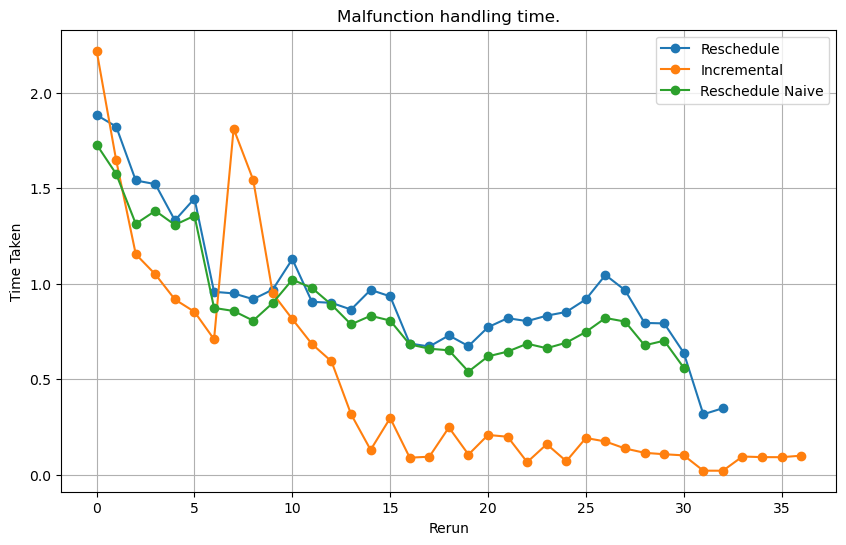

In [22]:
filtered = df[(df["Success"]==True) & (df["Instance"]=="envs/testing_instances/medium/medium_4_1.pkl")]
unique_secondaries = filtered["Secondary"].unique()
plt.figure(figsize=(10, 6))

dict = {"['asp/graph_reschedule/1_path.lp', 'asp/graph_reschedule/2_output.lp', 'asp/graph_reschedule/3_malfunction.lp']" : "Reschedule",
        "['asp/incremental/secondary.lp']": "Incremental",
        "['asp/graph_reschedule_naive/0_input.lp', 'asp/graph_reschedule_naive/1_path.lp', 'asp/graph_reschedule_naive/2_output.lp', 'asp/graph_reschedule_naive/3_malfunction.lp']": "Reschedule Naive"}

for secondary in unique_secondaries:
    secondary_filtered = filtered[filtered["Secondary"] == secondary]
    
    x_values = []
    y_values = []

    one_row = secondary_filtered.iloc[0]
    entry = one_row["Secondary Stats"]
    stats_list = ast.literal_eval(entry)
        
    for i, elem in enumerate(stats_list):
        total_value = elem["summary"]["times"]["total"]
        x_values.append(i)
        y_values.append(total_value)
    
    plt.plot(x_values, y_values, marker='o', label=f'{dict[secondary]}')

plt.title("Malfunction handling time.")
plt.xlabel('Rerun')
plt.ylabel('Time Taken')
plt.legend()
plt.grid()
plt.show()